#Problem Statement:

#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  



###About the data:

###Let’s consider a Company dataset with around 10 variables and 400 records.

###The attributes are as follows:

### Sales -- Unit sales (in thousands) at each location

### Competitor Price -- Price charged by competitor at each location
### Income -- Community income level (in thousands of dollars)
### Advertising -- Local advertising budget for company at each location (in thousands of dollars)
### Population -- Population size in region (in thousands)
### Price -- Price company charges for car seats at each site
### Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
### Age -- Average age of the local population
### Education -- Education level at each location
### Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
### US -- A factor with levels No and Yes to indicate whether the store is in the US or not
###The company dataset looks like this:


In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from collections import Counter
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
df = pd.read_csv("Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [ ]:
#Data Understanding

df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
df.shape

(400, 11)

In [ ]:
df.T

0      1       2       3     4      5       6      7       8    \
Sales        9.5  11.22   10.06     7.4  4.15  10.81    6.63  11.85    6.54   
CompPrice    138    111     113     117   141    124     115    136     132   
Income        73     48      35     100    64    113     105     81     110   
Advertising   11     16      10       4     3     13       0     15       0   
Population   276    260     269     466   340    501      45    425     108   
Price        120     83      80      97   128     72     108    120     124   
ShelveLoc    Bad   Good  Medium  Medium   Bad    Bad  Medium   Good  Medium   
Age           42     65      59      55    38     78      71     67      76   
Education     17     10      12      14    13     16      15     10      10   
Urban        Yes    Yes     Yes     Yes   Yes     No     Yes    Yes      No   
US           Yes    Yes     Yes     Yes    No    Yes      No    Yes      No   

                9    ...     390  391   392     393   394    395     396  \
Sales          4.69  ...    5.47  6.1  4.53    5.57  5.35  12.57    6.14   
CompPrice       132  ...     108  153   129     109   130    138     139   
Income          113  ...      75   63    42      51    58    108      23   
Advertising       0  ...       9    0    13      10    19     17       3   
Population      131  ...      61   49   315      26   366    203      37   
Price           124  ...     111  124   130     120   139    128     120   
ShelveLoc    Medium  ...  Medium  Bad   Bad  Medium   Bad   Good  Medium   
Age              76  ...      67   56    34      30    33     33      55   
Education        17  ...      12   16    13      17    16     14      11   
Urban            No  ...     Yes  Yes   Yes      No   Yes    Yes      No   
US              Yes  ...     Yes   No   Yes     Yes   Yes    Yes     Yes   

                397   398   399  
Sales          7.41  5.94  9.71  
CompPrice       162   100   134  
Income           26    79    37  
Advertising      12     7     0  
Population      368   284    27  
Price           159    95   120  
ShelveLoc    Medium   Bad  Good  
Age              40    50    49  
Education        18    12    16  
Urban           Yes   Yes   Yes  
US              Yes   Yes   Yes  

[11 rows x 400 columns]

###Descriptive analysis

In [ ]:
#descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

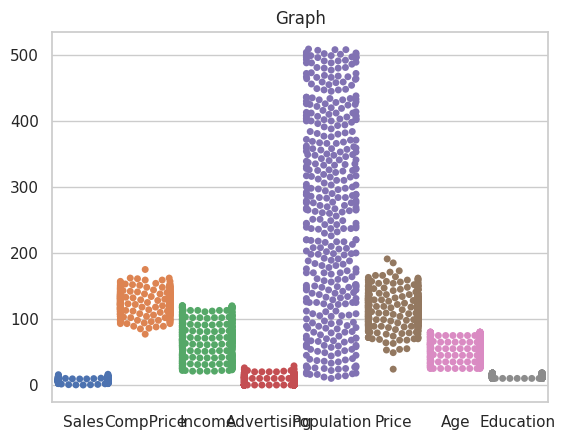

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data=df)

plt.title('Graph')

plt.show()

<Axes: >

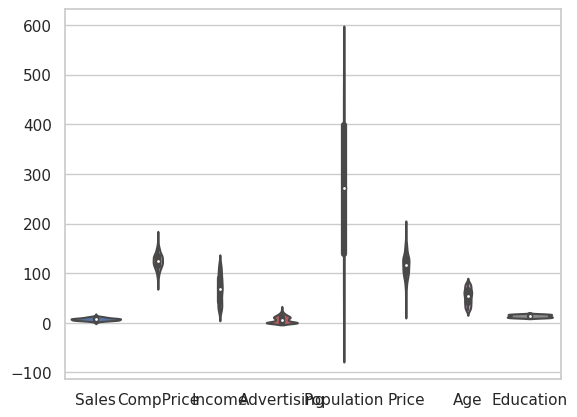

In [ ]:
 sns.violinplot(data=df)

<Axes: >

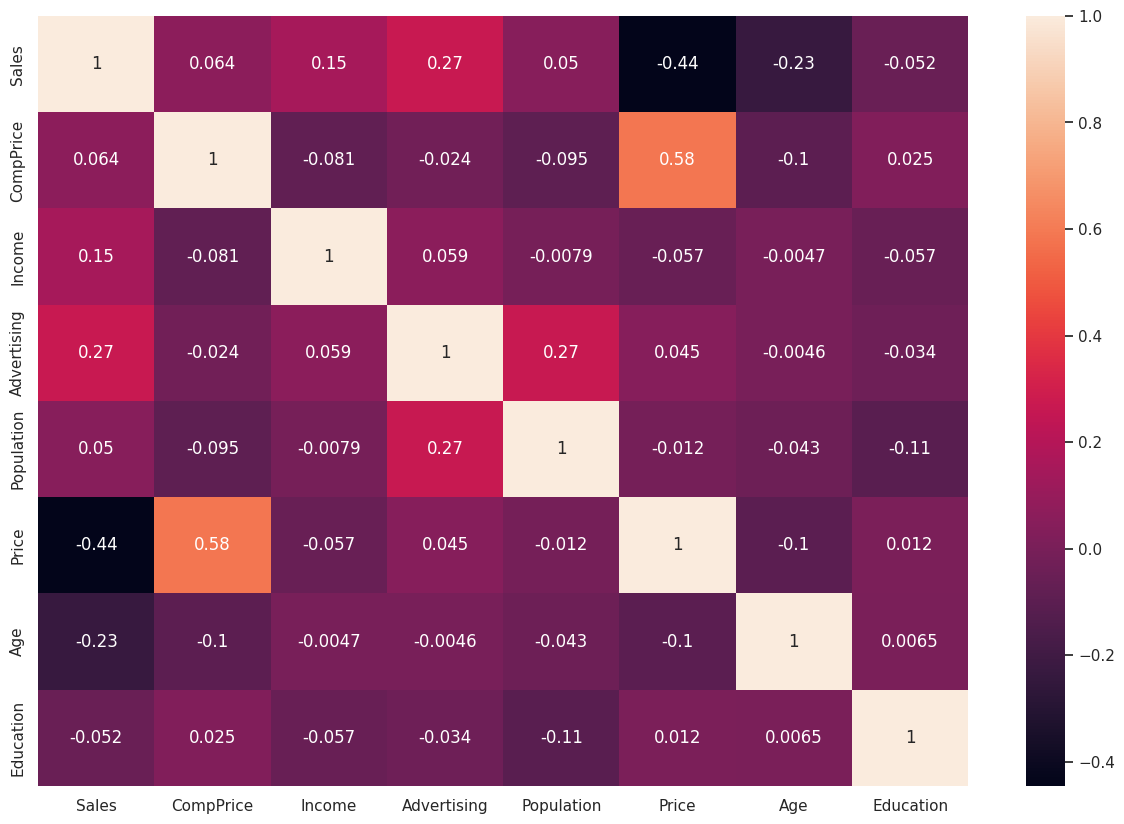

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
numerical_feature = df.describe(include=["int64", "float64"]).columns

print(list(numerical_feature))

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


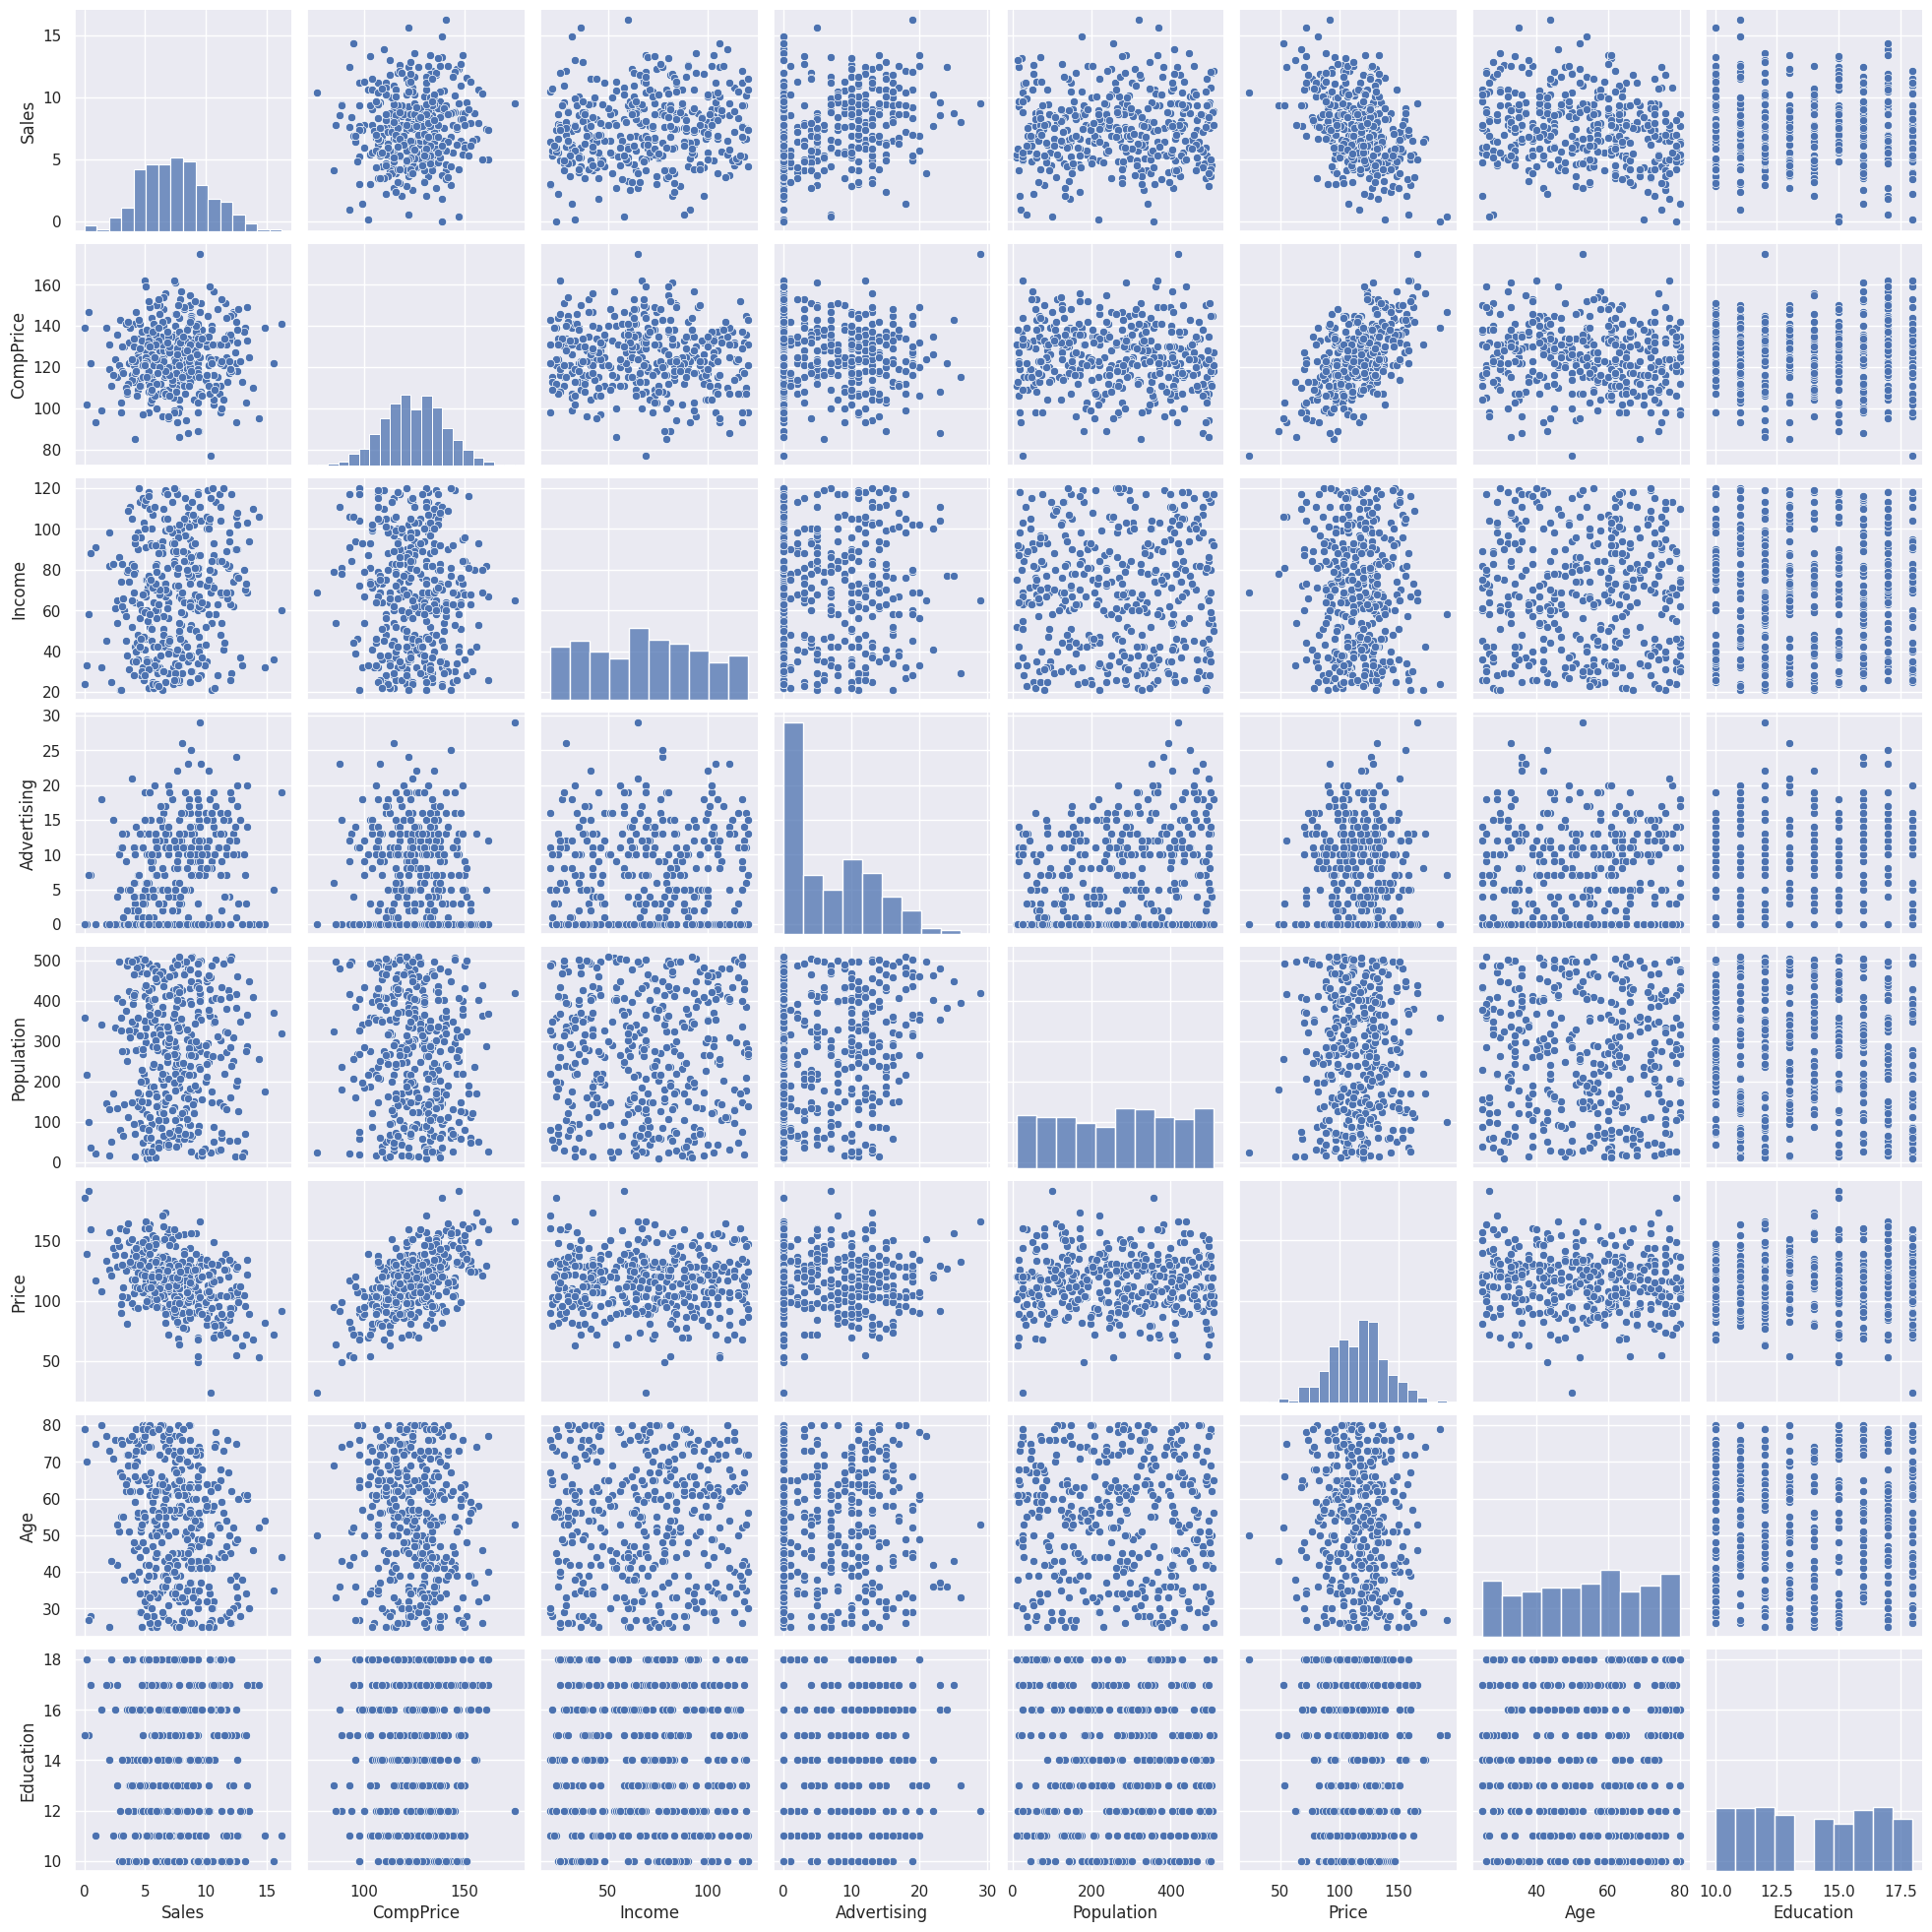

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(df[numerical_feature])
plt.show()

In [ ]:
categorical_feature = df.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


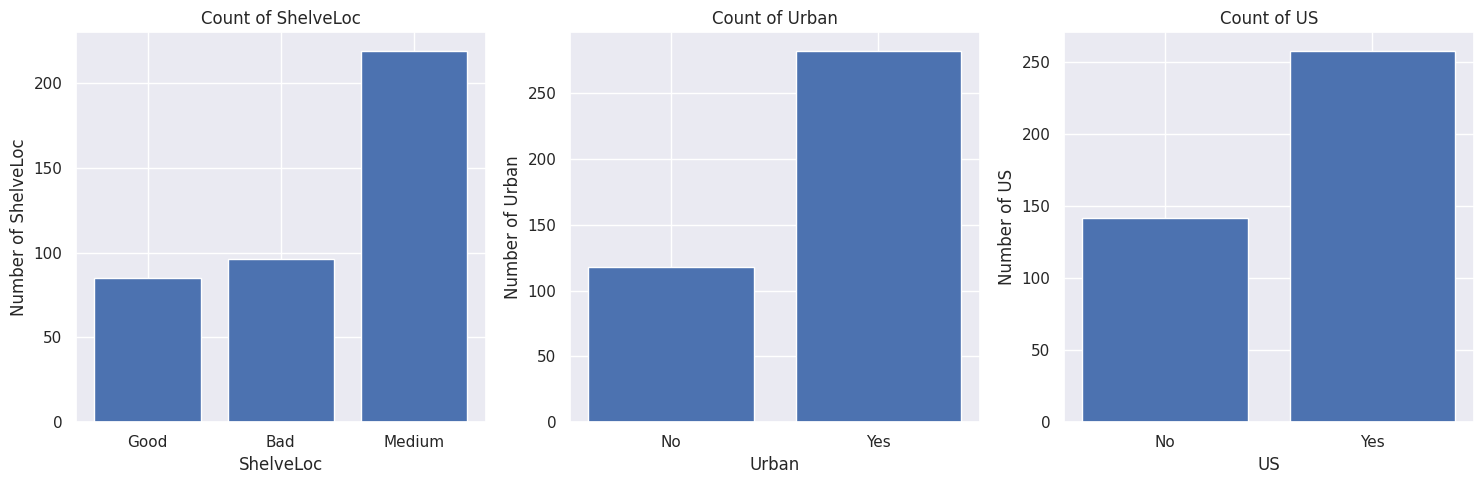

In [ ]:
plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df1 = df.copy()
    unique = df1[column].value_counts(ascending=True);

    plt.subplot(1, 3, idx+1)
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

plt.tight_layout()
plt.show()

###Feature Engineering

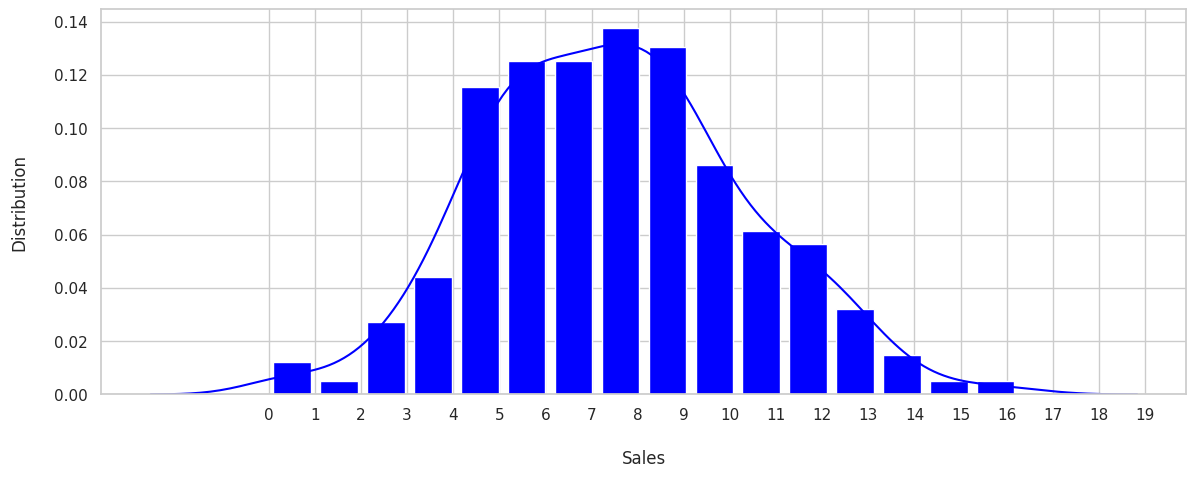

In [ ]:
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”

For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [ ]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
company = df.copy()
company['SalesCat'] = pd.cut(x = company['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US SalesCat  
0         17   Yes  Yes     High  
1         10   Yes  Yes     High  
2         12   Yes  Yes     High  
3         14   Yes  Yes   Medium  
4         13   Yes   No      Low

In [ ]:
company.SalesCat.value_counts()

Medium    198
High      102
Low       100
Name: SalesCat, dtype: int64

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  SalesCat     400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


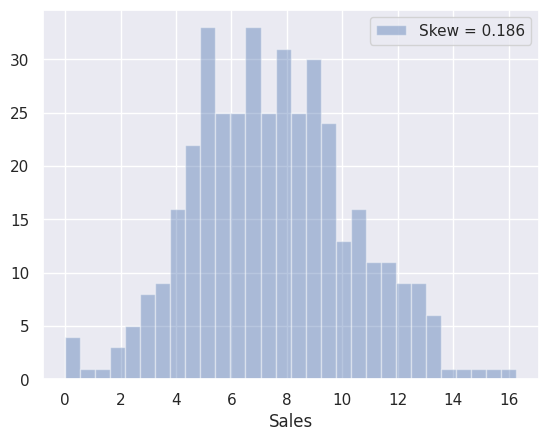

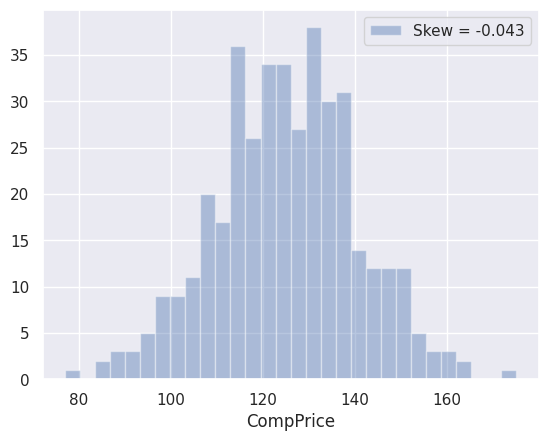

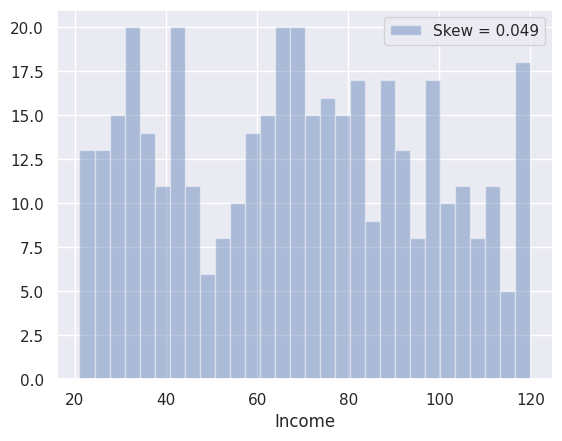

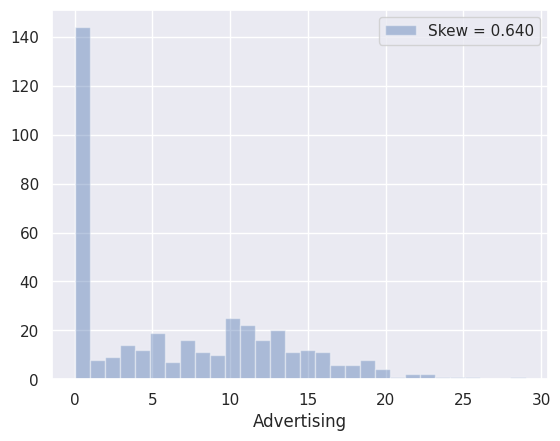

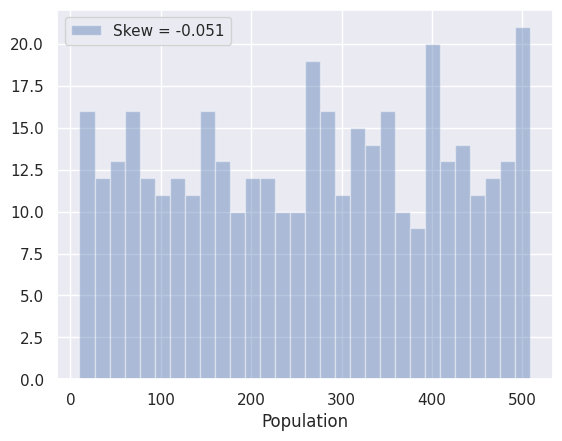

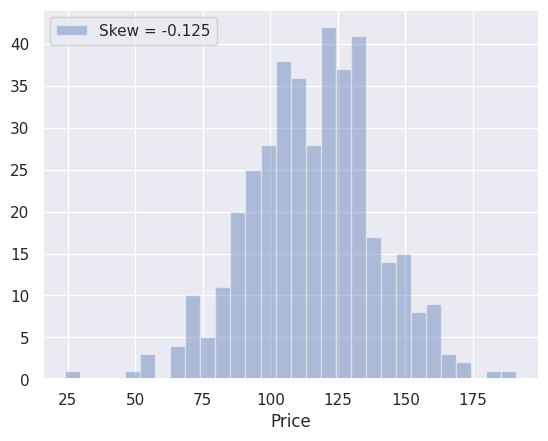

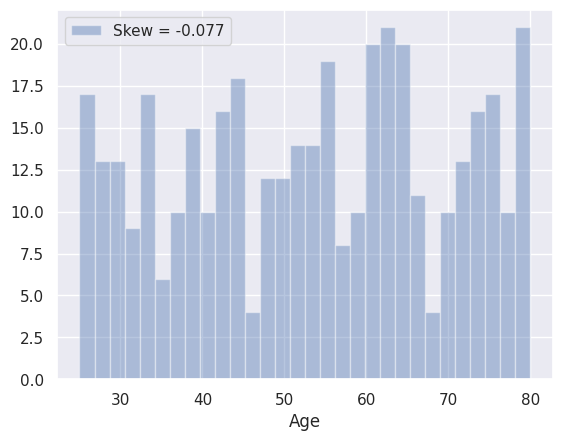

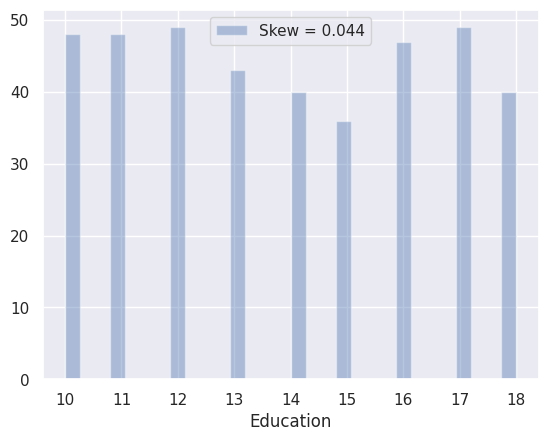

In [ ]:
#Exploratory Data Analysis
#Univariate plots

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

###Outliers

In [ ]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

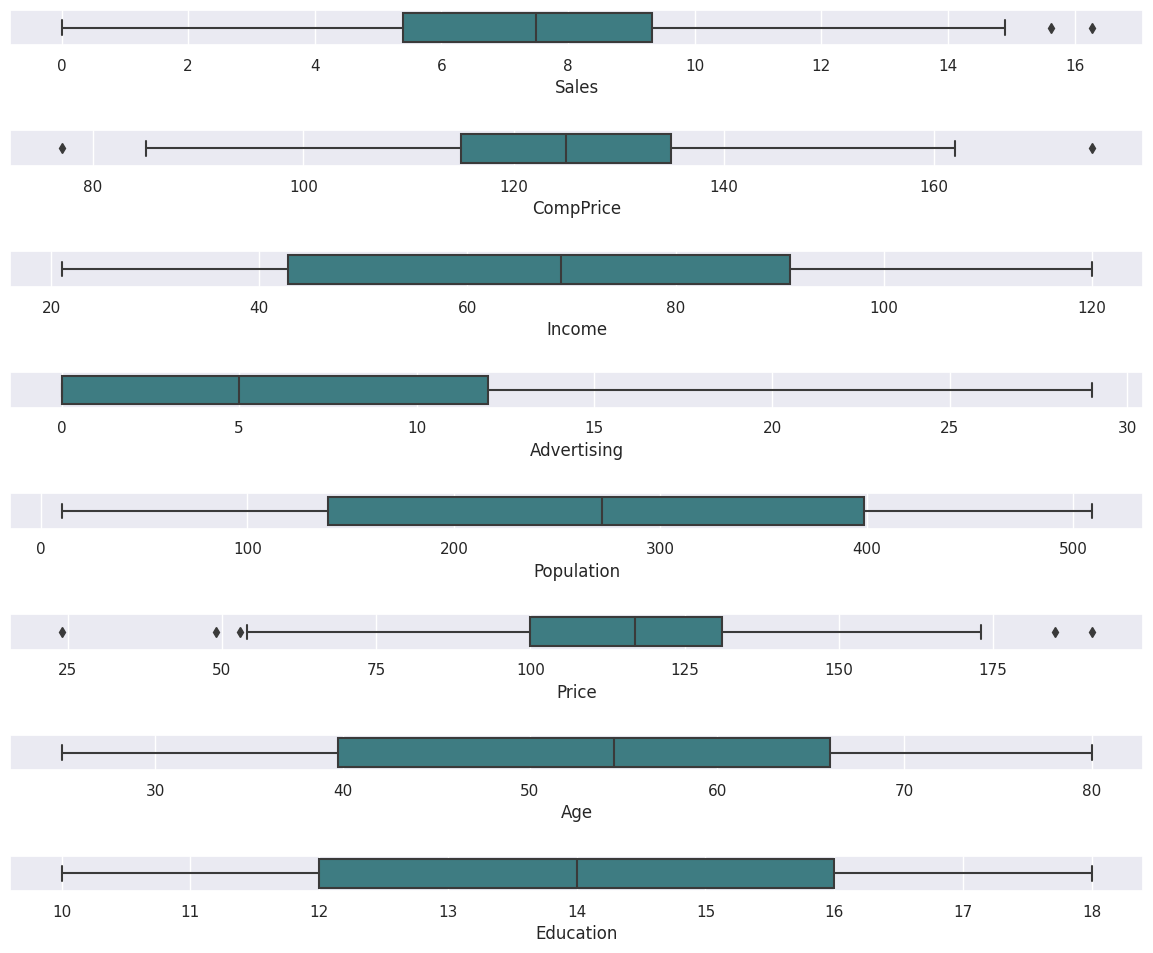

In [ ]:
outliers = df.copy()
fig, axes = plt.subplots(8,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Sales', data= outliers,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data= outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data= outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data= outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data= outliers,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data= outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data= outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data= outliers,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

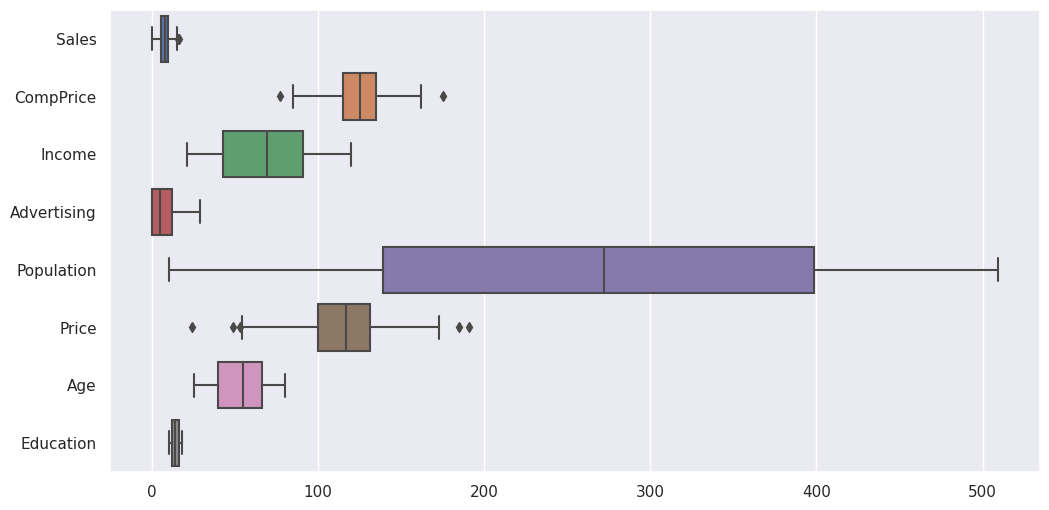

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_features], orient="h")
plt.show()

Population has a mean that is much superior to the other constituents as we already saw in the previous section.

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


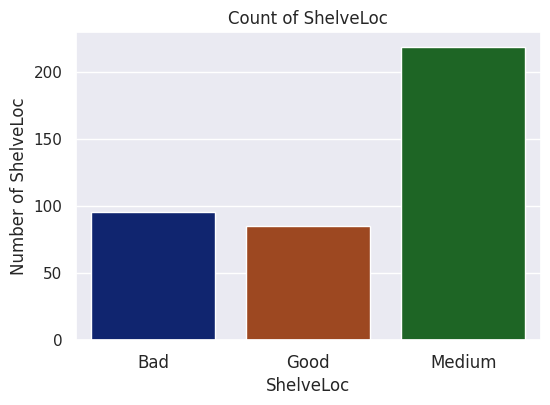

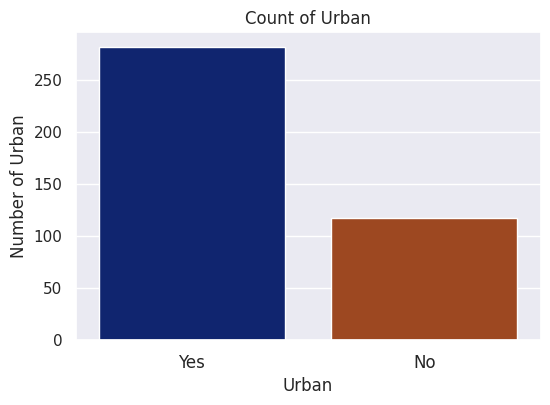

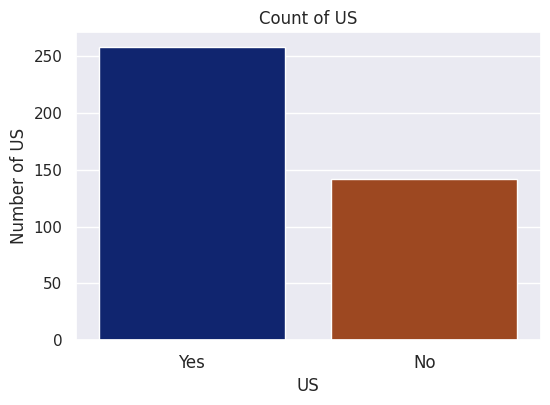

In [ ]:
print(categorical_feature)

for idx, column in enumerate(categorical_feature):
    plt.figure(figsize=(6,4))
    unique = company[column].value_counts(ascending=True);
    plt.title("Count of "+ column)
    sns.countplot(data= company, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
plt.show()

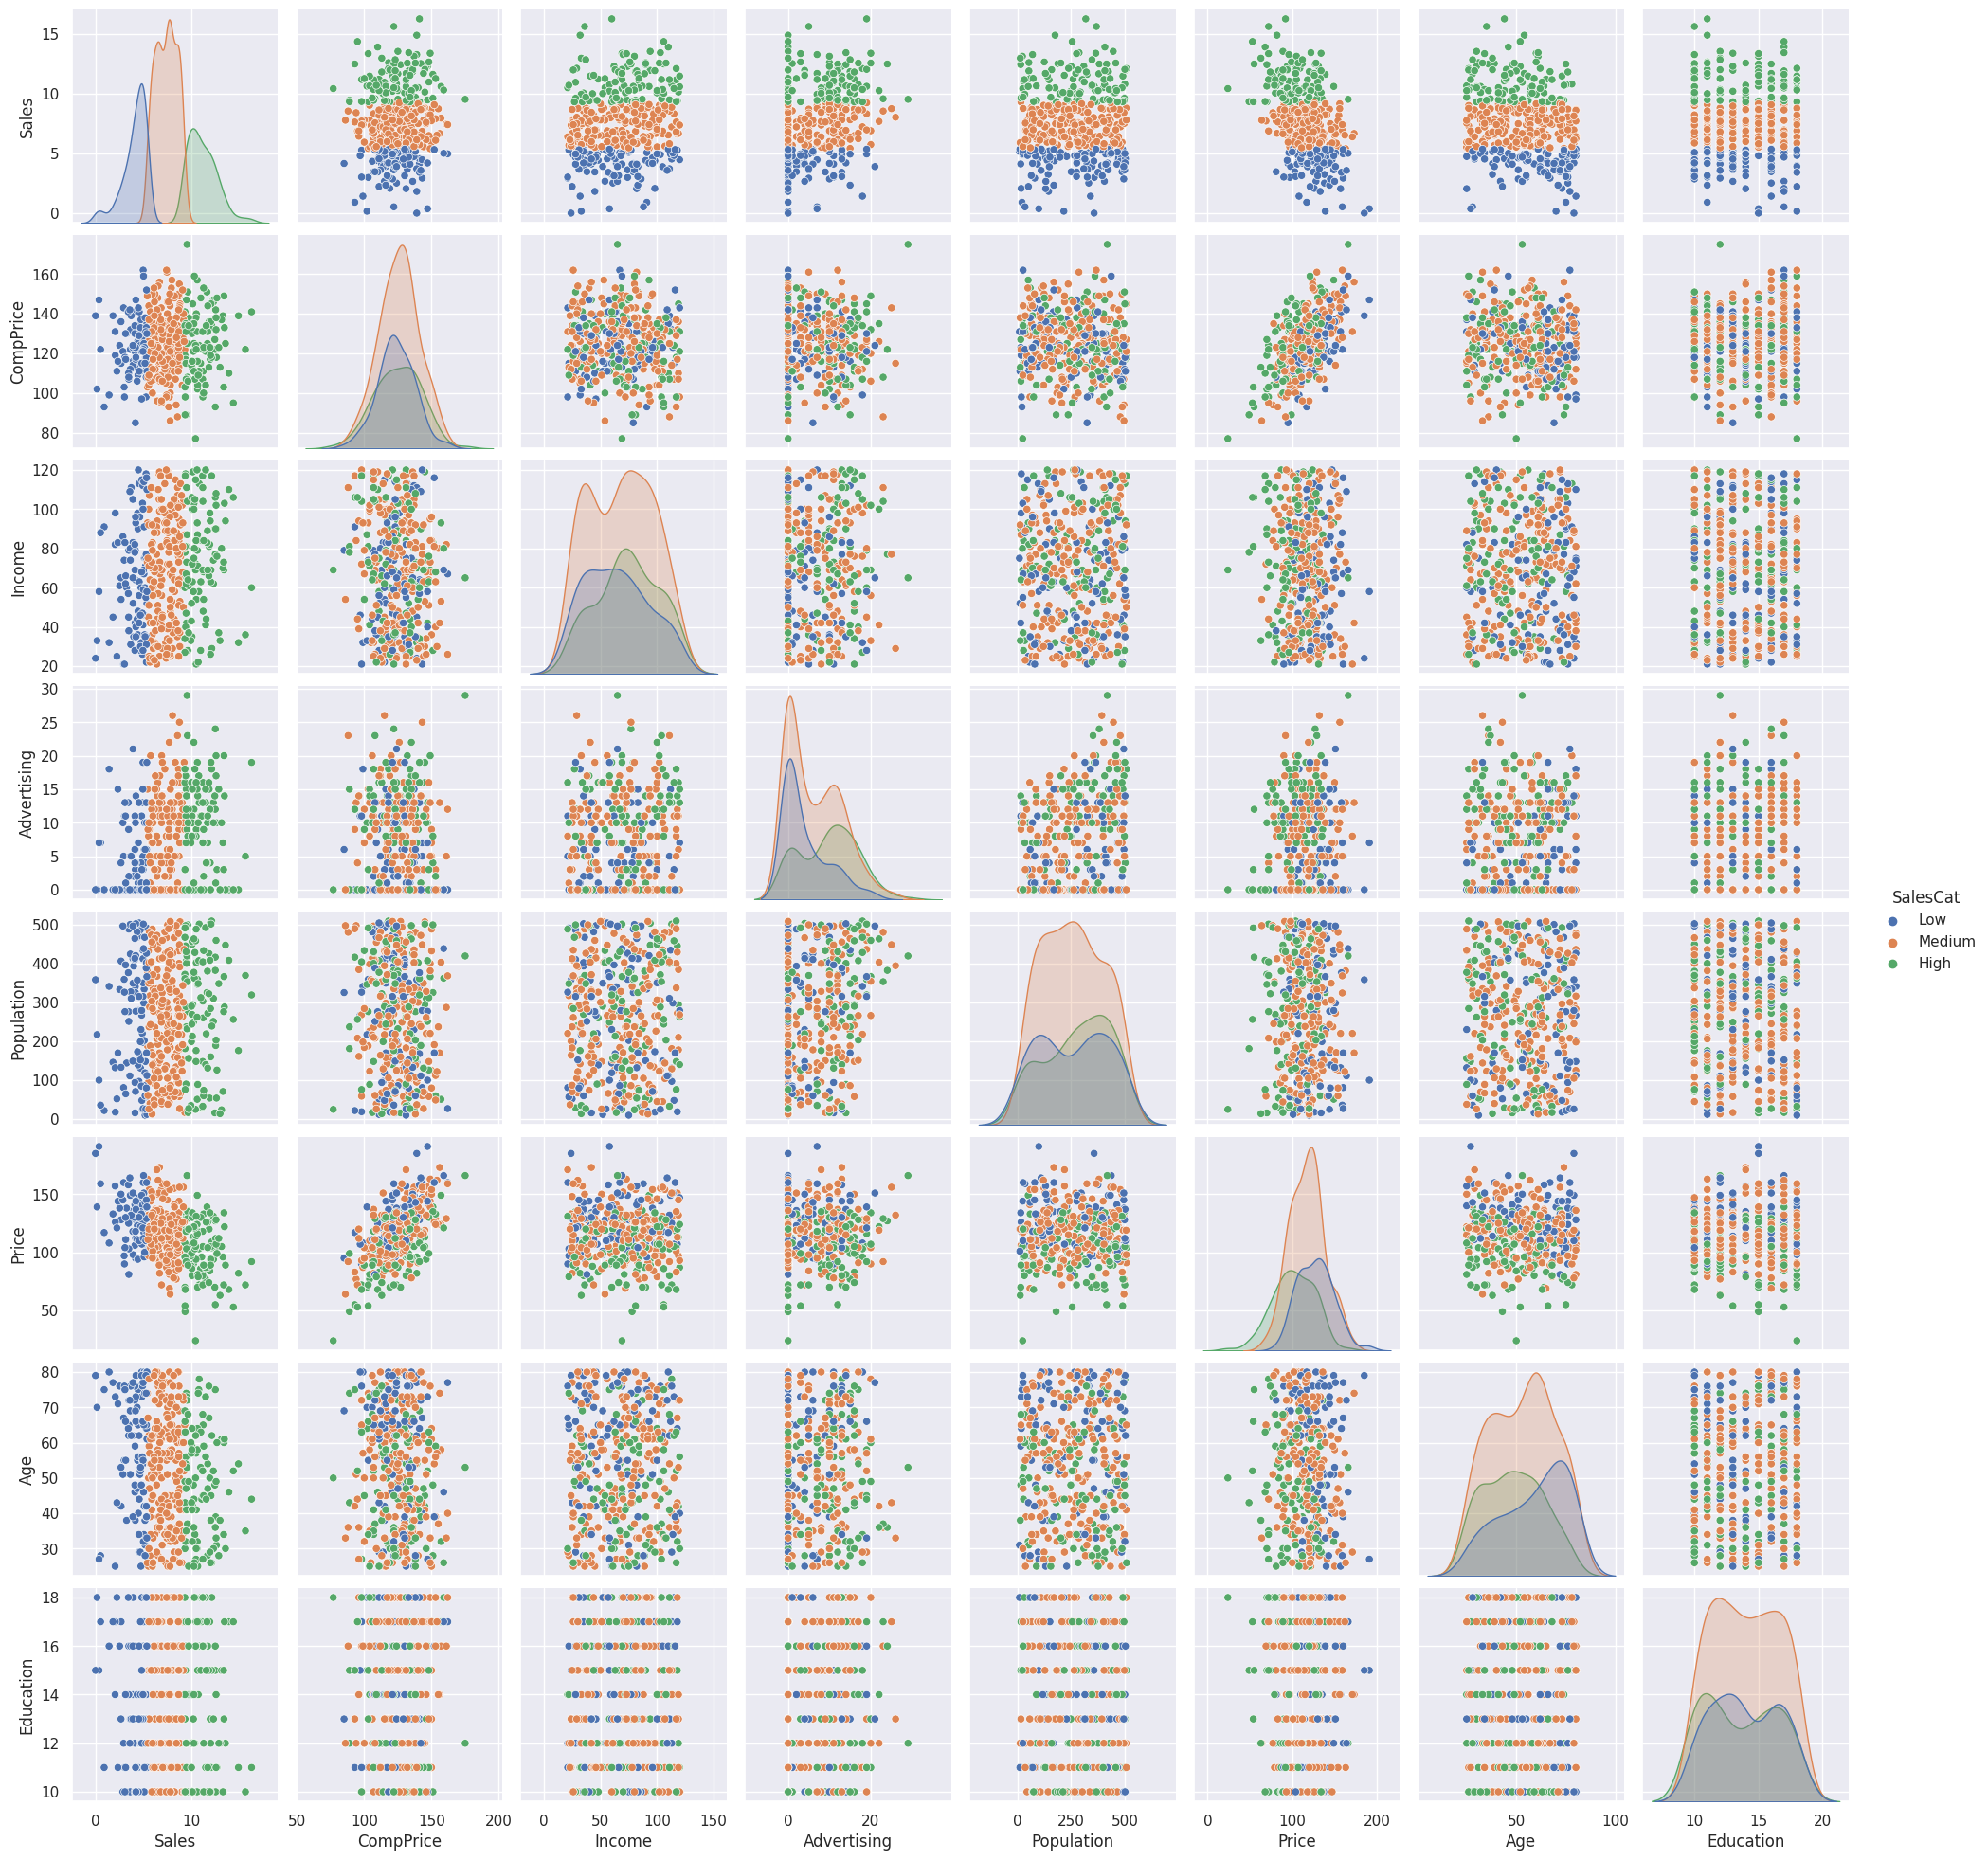

In [ ]:
sns.pairplot(data= company, hue = 'SalesCat')
plt.show()

In [ ]:
company_dummi = company.copy()
company_dummi.drop('Sales',axis=1, inplace =True)
company_data = pd.get_dummies(company.iloc[:,:-1])
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

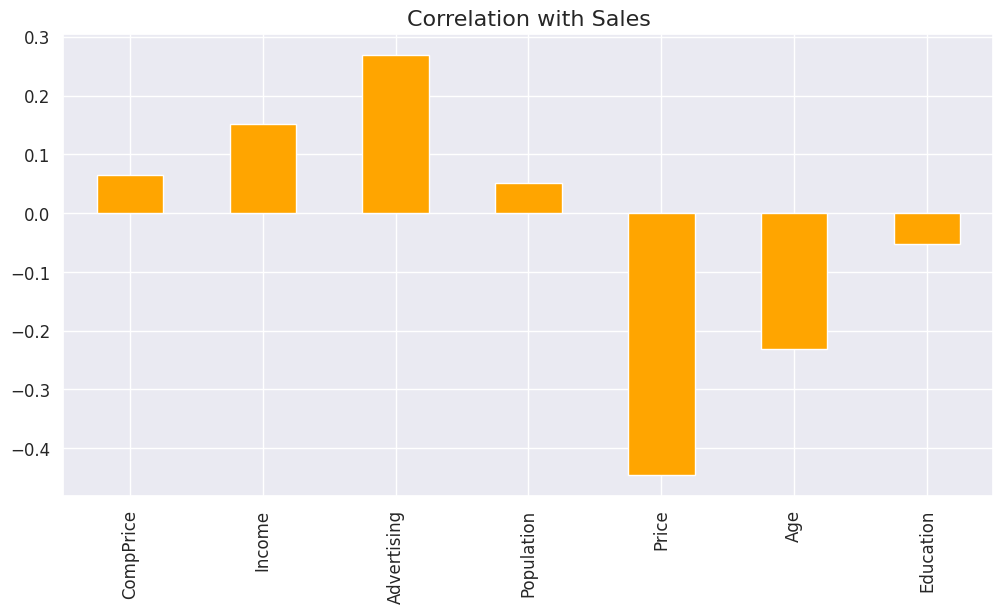

In [ ]:
company_data2 = company_dummi.copy()

correlations = company_data2.corrwith(company.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations <0].sort_values(ascending = False)

correlations.plot.bar(figsize = (12,6), fontsize = 12, color = 'orange', rot = 90, grid = True)
plt.title('Correlation with Sales',fontsize = "16")
plt.show()

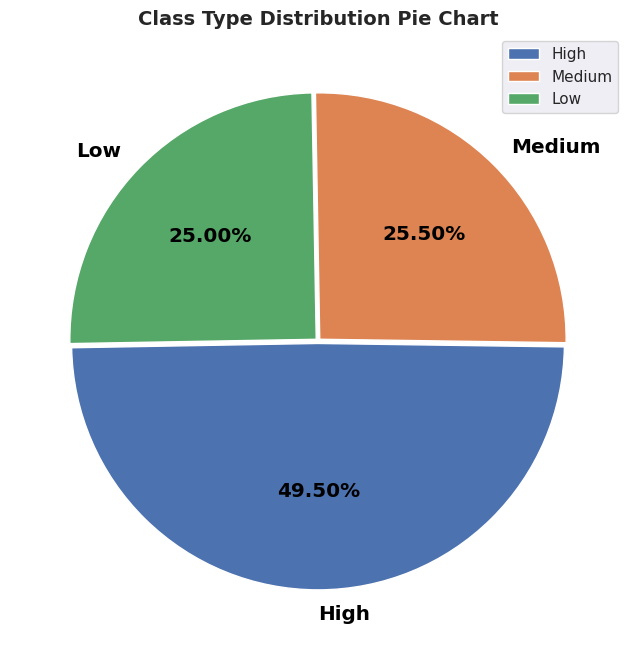

In [ ]:
#Checking for Imbalanced or balanced dataset with regards to the Target

plt.figure(figsize = (9,8))
plt.pie(company['SalesCat'].value_counts(), labels= company.SalesCat.unique(), explode = [0.01,0.01,0.01],
       autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':0,'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

the class “High” is called the majority class, and the much smaller in size “Low” and “Medium” class is called the minority class.

In [ ]:
company.SalesCat.value_counts()

Medium    198
High      102
Low       100
Name: SalesCat, dtype: int64

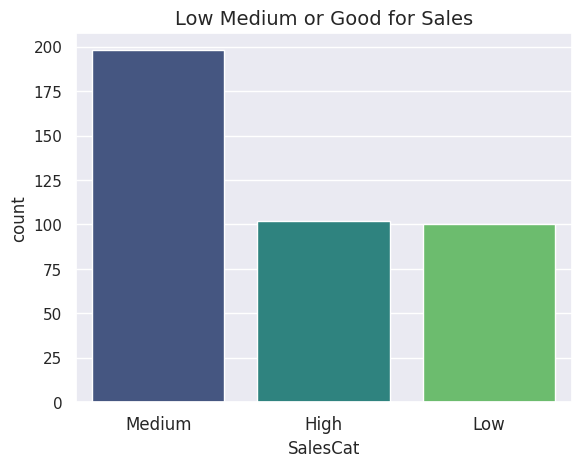

In [ ]:
sns.countplot(x= 'SalesCat', data= company, palette= 'viridis', order= company['SalesCat'].value_counts().index)
plt.xticks(fontsize= 12)
plt.title('Low Medium or Good for Sales', fontsize= 14)
plt.show()

###Data Pre-Processing

In [ ]:
company_data3 = company.copy()
company_data3.drop('Sales',axis=1, inplace =True)
company_data3 = pd.get_dummies(company_data3.iloc[:,:-1])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [ ]:
company_data3['Sales'] = company.SalesCat
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [ ]:
#Lable Encoding

le = LabelEncoder()
le.fit(company_data3["Sales"])
company_data3["Sales"]=le.transform(company_data3["Sales"])
company_data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [ ]:
#Split into input (x) and output (y) variables

x = company_data3.iloc[:, :-1]
y=  company_data3.Sales

In [ ]:
#Feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [ ]:
#Summarize scores

scores = fit.scores_
features = fit.transform(x)

In [ ]:
score_company_data = pd.DataFrame(list(zip(x.columns, scores)), columns =['Feature','Score'])
score_company_data.sort_values(by="Score", ascending=False, inplace=True)
score_company_data

Feature       Score
4              Price  300.881058
2        Advertising  251.767458
3         Population  141.113336
5                Age  106.577639
8     ShelveLoc_Good   66.174919
1             Income   65.145403
7      ShelveLoc_Bad   48.524460
12             US_No   13.109136
9   ShelveLoc_Medium    8.654770
13            US_Yes    7.215106
0          CompPrice    2.253637
6          Education    0.689685
10          Urban_No    0.163751
11         Urban_Yes    0.068520

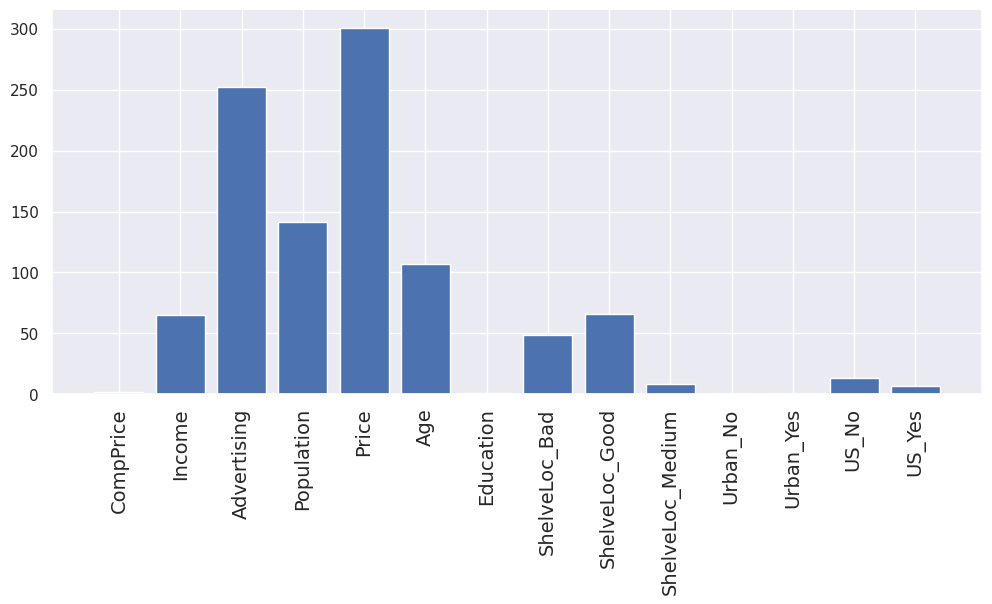

In [ ]:
fig, axes = plt.subplots(figsize=(12,5))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation= 90, size= 14)
plt.show()

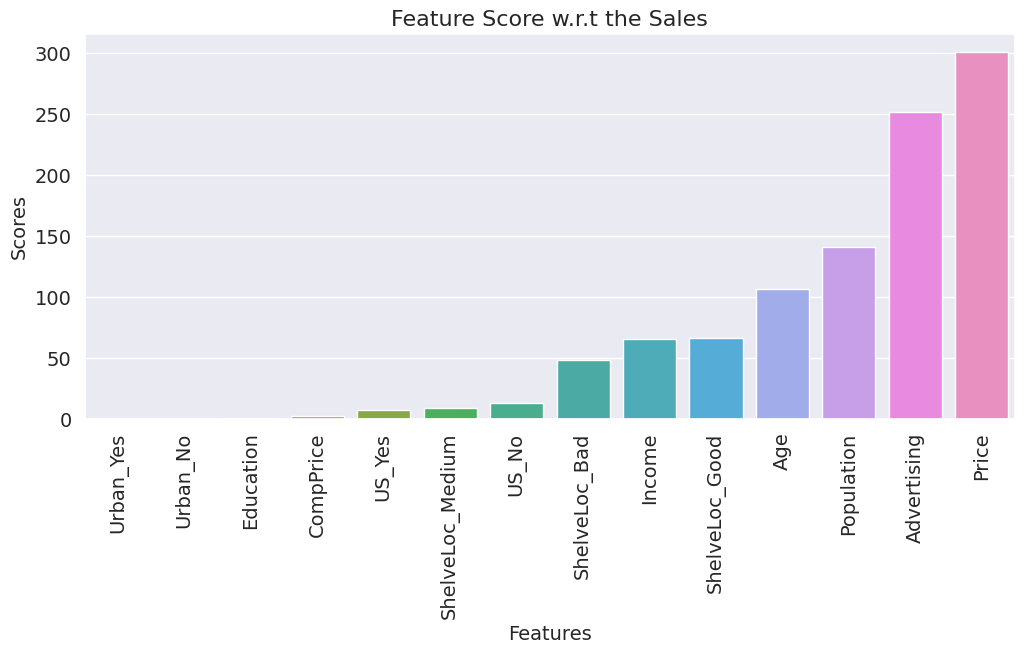

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Feature', y="Score", data= score_company_data, order=score_company_data.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.show()

In [ ]:
model_data = company_data3[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

In [ ]:
# Random Forest Built-in Feature Importance

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf_classifier.fit(x, y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

grid_search = GridSearchCV(estimator= rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_classifier.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.635
Best Score             : 0.66
RF Best Model          : RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


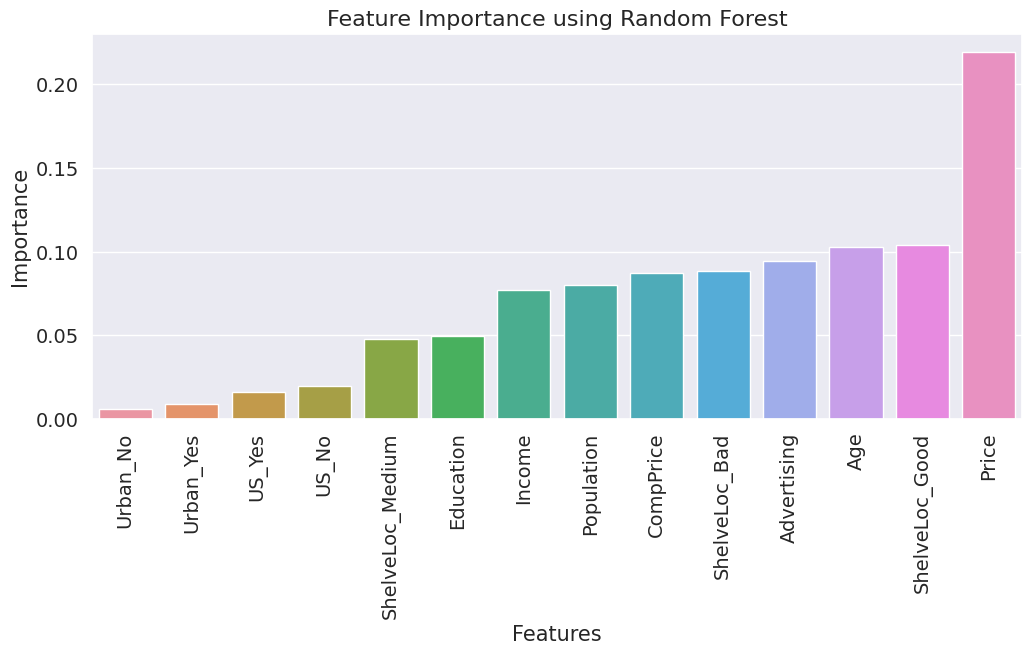

In [ ]:
#sort the data with the help of feature importance
rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": x.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12,5))
sns.barplot(x= 'Feature', y= "Importance", data= imp_df, order= imp_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Importance using Random Forest", size=16)
plt.show()

In [ ]:
# Test Train Split With Imbalanced Dataset

x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (280, 8)
Shape of x_test  :  (120, 8)
Shape of y_train :  (280,)
Shape of y_test  :  (120,)


###StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data :',counter_train)
print('Testing Data  :',counter_test)

Training Data : Counter({2: 178, 0: 92, 1: 90})
Testing Data  : Counter({2: 20, 1: 10, 0: 10})


###Stratify
####Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [ ]:
#Grid search using Stratified Kfold Splits on Imbalanced Dataset


def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100)
rf_clf1.fit(train_x, train_y)

print_score(rf_clf1, train_x, train_y, test_x, test_y, train=True)
print_score(rf_clf1, train_x, train_y, test_x, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    92.0  90.0  178.0       1.0      360.0         360.0
__________________________________________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 55.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy  macro avg  weighted avg
precision   0.800000   0.444444   0.538462      0.55   0.594302      0.580342
recall      0.400000   0.400000   0.700000      0.55   0.500000      0.550000
f1-score    0.533333   0.421053   

In [ ]:
 #Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset
rf_clf2 = RandomForestClassifier(n_estimators=100)
rf_clf2.fit(x_train, y_train)

print_score(rf_clf2, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf2, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0   1.0    1.0       1.0        1.0           1.0
support    71.0  70.0  139.0       1.0      280.0         280.0
__________________________________________________________________________
Confusion Matrix: 
 [[ 71   0   0]
 [  0  70   0]
 [  0   0 139]]

Test Result:
Accuracy Score: 65.83%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.760000   0.652174   0.625000  0.658333    0.679058      0.666668
recall      0.612903   0.500000   0.762712  0.658333    0.625205      0.658333
f1-score    0.678571   0.566038

both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

###Handling imbalance data using SMOTE based techniques


Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts

In [ ]:
x = model_data.drop(['Sales'], axis=1)
y = model_data['Sales']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=15,stratify=y)

In [ ]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (280, 8)
Shape of x_test  :  (120, 8)
Shape of y_train :  (280,)
Shape of y_test  :  (120,)


In [ ]:
#SMOTE Oversampling technique

counter1 = Counter(y_train)
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
counter2 = Counter(y_train_sm)

print('Before :',counter1)
print('After  :',counter2)


Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 139, 2: 139, 0: 139})


In [ ]:
#ADASYN: Adaptive Synthetic Sampling Approach

counter1 = Counter(y_train)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)
counter2 = Counter(y_train_ada)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 140, 2: 139, 0: 135})


In [ ]:
#Hybridization: SMOTE + Tomek Links

counter1 = Counter(y_train)
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)
counter2 = Counter(y_train_smtom)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 129, 0: 129, 2: 121})


In [ ]:
#Hybridization: SMOTE + ENN

counter1 = Counter(y_train)
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)
counter2 = Counter(y_train_smenn)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 58, 0: 57, 2: 10})


In [ ]:
# Performance Analysis after Resampling

sample_data = {'ACTUAL':[x_train, y_train], 'SMOTE':[x_train_sm, y_train_sm], 'ADASYN':[x_train_ada, y_train_ada],
               'SMOTE_TOMEK':[x_train_smtom, y_train_smtom], 'SMOTE_ENN':[x_train_smenn, y_train_smenn]}

In [ ]:
def test_eval(clf_model, x_test, y_test, algo= None, sampling=None):
    # Test set prediction
    y_prob = clf_model.predict_proba(x_test)
    y_pred = clf_model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")

    f1        = f1_score(y_test, y_pred, average='micro')
    recall    = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')

    return algo,precision,recall,f1,sampling

In [ ]:
model_params = {'random-forest' : {'model' : RandomForestClassifier(), 'params' : {"n_estimators": [5, 10, 15, 20, 25],
                'max_depth': [i for i in range(5,16,2)], 'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
                'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy'], 'max_features': ['log2', 'sqrt', 'auto']}}}

In [ ]:
cv = StratifiedKFold (n_splits=5, random_state=100, shuffle=True)
output = []
for model, model_hp in model_params.items():
    for resampl, data in sample_data.items():
        clf3 = RandomizedSearchCV (model_hp['model'], model_hp['params'], cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf3.fit(data[0], data[1])
        clf_best1 = clf3.best_estimator_
        print('='*60)
        print(model+' with ' + resampl)
        print('-'*60)
        output.append(test_eval(clf_best1, x_test, y_test, model, resampl))

random-forest with ACTUAL
------------------------------------------------------------
Confusion Matrix
[[ 9  3 19]
 [ 0 13 17]
 [ 6  5 48]] 

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        31
           1       0.62      0.43      0.51        30
           2       0.57      0.81      0.67        59

    accuracy                           0.58       120
   macro avg       0.60      0.51      0.52       120
weighted avg       0.59      0.58      0.56       120
 

random-forest with SMOTE
------------------------------------------------------------
Confusion Matrix
[[21  1  9]
 [ 0 13 17]
 [12  8 39]] 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        31
           1       0.59      0.43      0.50        30
           2       0.60      0.66      0.63        59

    accuracy                           0.61       120
   macro avg    

 the results can be compared, ADASYN technique gave the best results we are going to use it further

In [ ]:
counter1 = Counter(y_train)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)
counter2 = Counter(y_train_ada)

print('Before :',counter1)
print('After  :',counter2)

Before : Counter({2: 139, 0: 71, 1: 70})
After  : Counter({1: 140, 2: 139, 0: 135})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=0, stratify=y_train_ada)

counter1 = Counter(y_train_ada)
counter2 = Counter(y_train)
print('Before           :',counter1)
print('After            :',counter2)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Before           : Counter({1: 140, 2: 139, 0: 135})
After            : Counter({1: 98, 2: 97, 0: 94})
Shape of X_train :  (289, 8)
Shape of X_test  :  (125, 8)
Shape of y_train :  (289,)
Shape of y_test  :  (125,)


###Random Forest

In [ ]:
#Random Forest hyperparameter tuning
#Base model

score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 12)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [ ]:
loc = np.array(score_array).max()
score_array.index(loc)+1

26

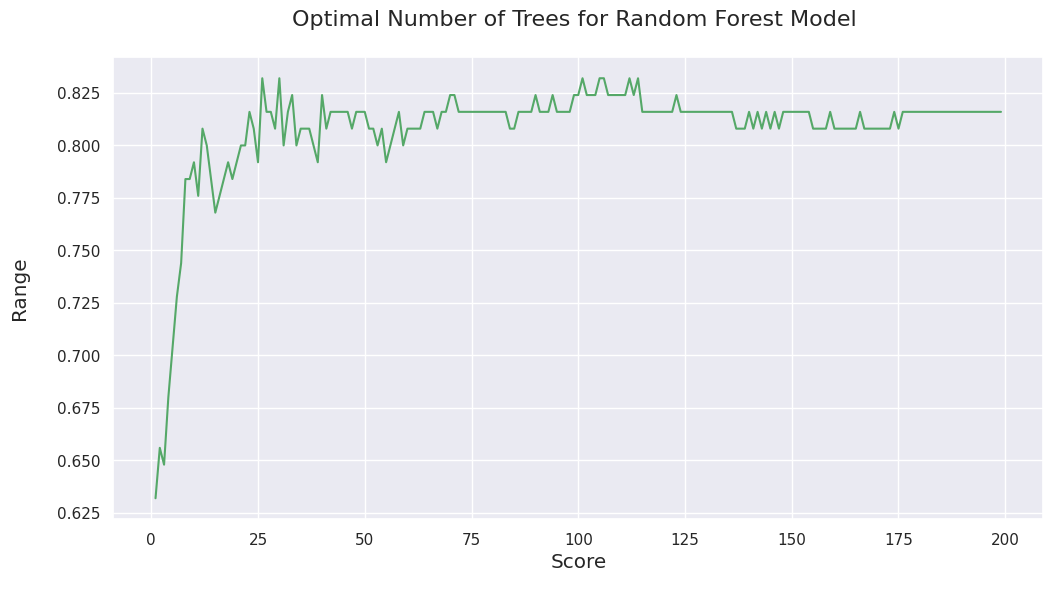

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,200),score_array, color = 'g')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n', horizontalalignment="center", fontsize = 16)
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#Randomized Search Cross Validation

n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV (estimator=rf_clf, scoring='f1',param_distributions=random_grid,
                            n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 93.77%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1          2  accuracy   macro avg  weighted avg
precision   0.956989   0.923077   0.934783  0.937716    0.938283      0.938036
recall      0.946809   0.979592   0.886598  0.937716    0.937666      0.937716
f1-score    0.951872   0.950495   0.910053  0.937716    0.937473      0.937369
support    94.000000  98.000000  97.000000  0.937716  289.000000    289.000000
__________________________________________________________________________
Confusion Matrix: 
 [[89  1  4]
 [ 0 96  2]
 [ 4  7 86]]

Test Result:
Accuracy Score: 79.20%
__________________________________________________________________________
CLASSIFICATION RE

In [ ]:
#Visualizing one of the decision tree in random forest
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, max_features='auto', min_samples_leaf=4,
                       n_estimators=195, random_state=42)

In [ ]:
company.SalesCat.unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

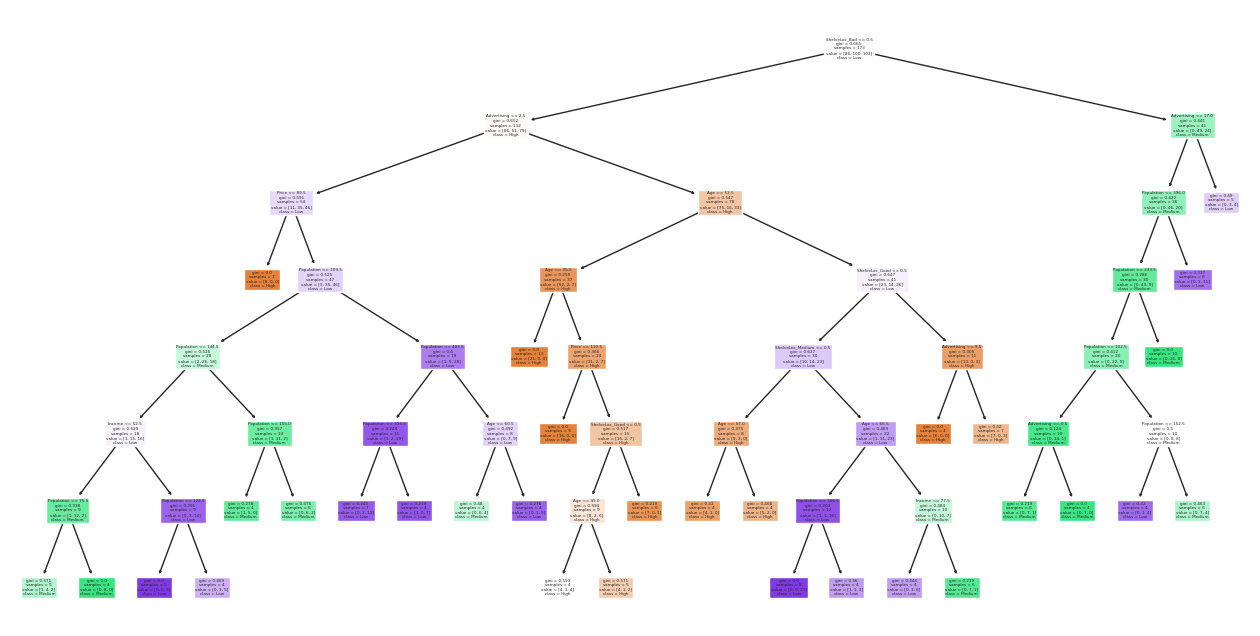

In [ ]:
plt.figure(figsize=(16,8))
plot_tree(rf_best.estimators_[190], feature_names = model_data.columns,class_names=company.SalesCat.unique(),filled=True)
plt.show()

In [ ]:
company_1 = pd.get_dummies(df)

In [ ]:
company_1['Category'] = pd.cut(company_1['Sales'],
                        bins=[0,10, np.inf],
                        labels=['Average','High'],
                        include_lowest=True)
company_1

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes Category  
0        0       1  Average  
1        0       1     High  
2        0       1     High  
3        0       1  Average  
4        1       0  Average  
..     ...     ...      ...  
395      0       1     High  
396      0       1  Average  
397      0       1  Average  
398      0       1  Average  
399      0       1  Average  

[400 rows x 16 columns]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array = company_1.values
X = array[:,1:15]
Y = array[:,15]
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean()*100)

86.25


In [ ]:
#Ensemble techniques
#1. Bagging

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 10

cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(results1.mean()*100)

86.75


In [ ]:
# Boosting
#AdaBoost Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean()*100)

89.75


In [ ]:
#Stacking

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
#Iteration = 1

estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))

model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))

model5 = SVC()
estimators.append(('svm', model5))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

89.50000000000001


In [ ]:
#Iteration = 2

estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))

model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))

model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))

model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

89.49999999999999


In [ ]:
#Iteration = 3

estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))

model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))

model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

89.75


In [ ]:
#Iteration = 4

estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))

model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

87.75


In [ ]:
#Iteration = 5

estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))

model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

91.5


In [ ]:
#Model Deployement
from pickle import dump
dump(rf_clf,open('company_data_intell.pkl','wb'))